## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
combined_data_ = pd.merge(mouse_metadata, study_results,
                                 how='outer',on='Mouse ID')


In [2]:
# Checking the number of mice.
number_of_mice = combined_data_["Mouse ID"].count()
number_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mice_data = combined_data_df["Mouse ID"].value_counts()
#timepoint_data = combined_data_df["Timepoint"].value_counts()
#mice_data
#timepoint_data
combined_data_.duplicated(subset = 'Mouse ID')


0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_data_df.drop_duplicates(keep = 'first')
#combined_data_df
combined_data_.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
combined_data_.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary = pd.DataFrame(combined_data_.groupby("Drug Regimen").count())

summary["Mean"] = pd.DataFrame(combined_data_.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean())
summary["Median"]= pd.DataFrame(combined_data_.groupby("Drug Regimen")['Tumor Volume (mm3)'].median())
summary["Standard Deviation"]= pd.DataFrame(combined_data_.groupby("Drug Regimen")['Tumor Volume (mm3)'].std())
summary["Variance"]= pd.DataFrame(combined_data_.groupby("Drug Regimen")['Tumor Volume (mm3)'].var())
summary["SEM"]= pd.DataFrame(combined_data_.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem())

summary = summary[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summary = summary.rename(columns = {"Mouse ID" : "Trials"})

summary.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar and Pie Charts

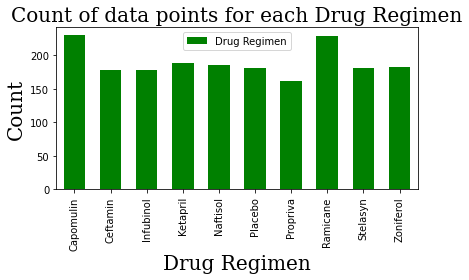

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="green")


#Signature
font1 = {'family':'serif','color':'black','size':20}
plt.title("Count of data points for each Drug Regimen", fontdict = font1)
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='green', align="center", width = 0.6)
plt.xlabel("Drug Regimen", fontdict = font1)
plt.ylabel("Count", fontdict = font1)
plt.tight_layout()

Text(0, 0.5, 'Count')

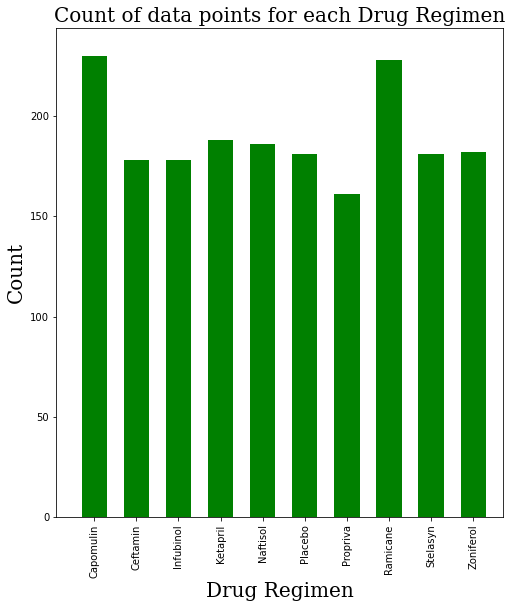

In [57]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(8,9))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

#Limits
plt.xlim(-0.9, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.06)


#Signature
plt.title("Count of data points for each Drug Regimen", fontdict = font1)
font1 = {'family':'serif','color':'black','size':20}
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='green', align="center", width = 0.6)
plt.xlabel("Drug Regimen", fontdict = font1)
plt.ylabel("Count", fontdict = font1)

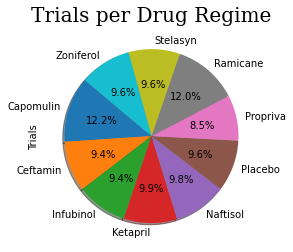

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Filter the DataFrame down only to those columns to chart
data = summary[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
data.plot(kind="pie", labels=data.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)



#Signature
font1 = {'family':'serif','color':'black','size':20}
plt.title("Trials per Drug Regime", fontdict = font1)

plt.show()

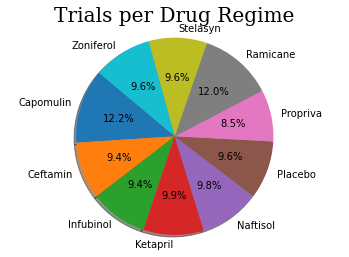

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(data["Trials"], labels=data.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.axis("equal")

#title for the chart
font1 = {'family':'serif','color':'black','size':20}
plt.title("Trials per Drug Regime", fontdict = font1)


plt.show()


#I kept running into a name 'explode' error on both pie graphs im not sure why. I also was having the same issue with 'colors' not being defined.

## Quartiles, Outliers and Boxplots

In [87]:
 
# Grab data 
calc = combined_data_.loc[(combined_data_["Drug Regimen"] == "Capomulin") | (combined_data_["Drug Regimen"] == "Ramicane") | (combined_data_["Drug Regimen"] == "Ceftamin") | (combined_data_["Drug Regimen"] == "Propriva"), :]

# Sort values
calc = calc.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
calc = calc.drop_duplicates(subset="Mouse ID", keep='first')
    
# quartiles
quartiles = calc['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
#outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
#outliers_df

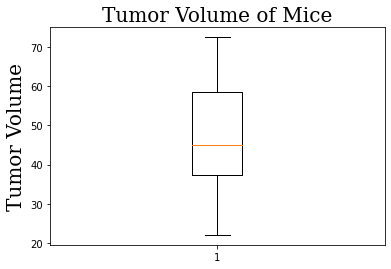

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = calc['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()



#Signature
font1 = {'family':'serif','color':'black','size':20}
ax1.set_title('Tumor Volume of Mice', fontdict = font1)
ax1.set_ylabel('Tumor Volume',fontdict = font1)
ax1.boxplot(Tumor_Volume,)
plt.show()



In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
calc = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Propriva"), :]

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

## Line and Scatter Plots

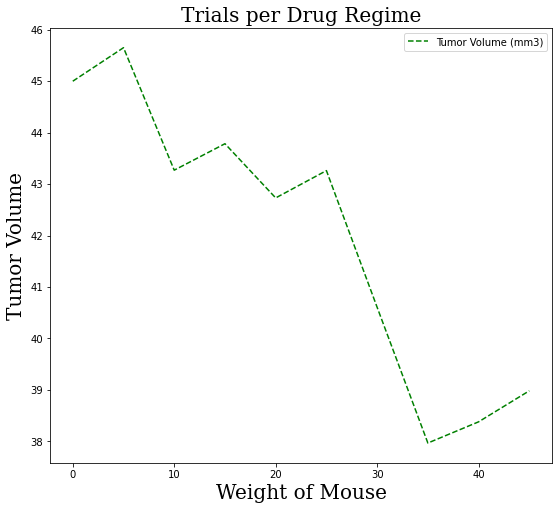

In [117]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin = combined_data_.loc[combined_data_["Drug Regimen"] == "Capomulin"]
capomulin = capomulin.reset_index()
singlecapomulin = capomulin.loc[capomulin["Mouse ID"] == "b128"]
singlecapomulin = singlecapomulin.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
singlecapomulin = singlecapomulin.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
singlecapomulin.set_index('Timepoint').plot(figsize=(9, 8), linestyle = 'dashed',  c = 'green')


#Signature
font1 = {'family':'serif','color':'black','size':20}
plt.title("Trials per Drug Regime", fontdict = font1)
plt.xlabel("Weight of Mouse",fontdict = font1)
plt.ylabel("Tumor Volume",fontdict = font1)
plt.show()

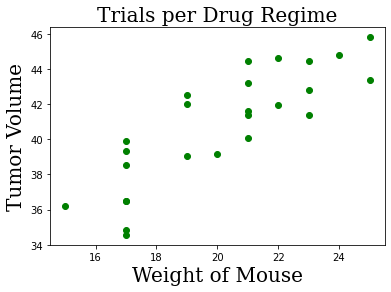

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Pull values for x and y values


mouse_weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above



#Signature
font1 = {'family':'serif','color':'black','size':20}
plt.title("Trials per Drug Regime", fontdict = font1)
plt.scatter(mouse_weight,tumor_volume, c = 'green')
plt.xlabel("Weight of Mouse",fontdict = font1)
plt.ylabel("Tumor Volume",fontdict = font1)
plt.show()

## Correlation and Regression

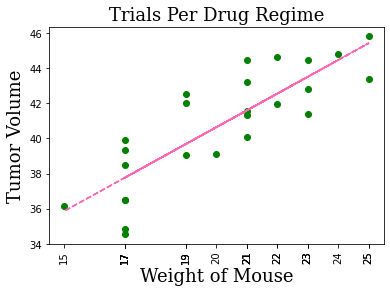

The correlation between weight and tumor value is 0.84


In [123]:
mouse_weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# linear regression
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# equation of line
fit = slope * mouse_weight + int

#Signature
font1 = {'family':'serif','color':'black','size':18}
plt.title("Trials Per Drug Regime", fontdict = font1)
plt.scatter(mouse_weight,tumor_volume, c = 'green')
plt.xlabel("Weight of Mouse",fontdict = font1)
plt.ylabel("Tumor Volume",fontdict = font1)
plt.plot(mouse_weight,fit, linestyle = 'dashed', c = 'hotpink')
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')

